In [ ]:
!mkdir -p ~/ .kaggle

In [ ]:
!cp /content/kaggle.json /content/.kaggle/

In [ ]:
import os

# Set the KAGGLE_CONFIG_DIR environment variable
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Pretrained CNN Models:

## 1. VGG16

## 2. VGG19

## 3. ResNet

## 4. Inception_Net(Google_Net)

## 5. Mobile Net

## 6. Nasnet

## 7. Effient Net

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
import numpy as np

In [ ]:
model = VGG16(weights="imagenet")

In [ ]:
img_path ="/content/Dog.png"

In [ ]:
img = image.load_img(img_path,target_size=(224,224))

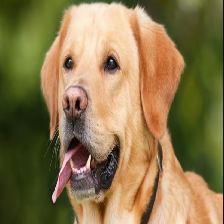

In [ ]:
img

In [ ]:
img = image.img_to_array(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img = np.expand_dims(img,axis=0)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
prediction = model.predict(img)

1/1 [==============================] - 2s 2s/step


# VGG16

In [ ]:
decode_predictions(prediction)

[[('n02109047', 'Great_Dane', 0.3528609),
  ('n02092339', 'Weimaraner', 0.22702079),
  ('n02099712', 'Labrador_retriever', 0.1717648),
  ('n02104029', 'kuvasz', 0.08492035),
  ('n02110341', 'dalmatian', 0.06325904)]]

# ResNet

In [ ]:
model2 = ResNet50(weights="imagenet")

In [ ]:
img = preprocess_input(img)

In [ ]:
prediction = model.predict(img)

1/1 [==============================] - 0s 22ms/step


In [ ]:
decode_predictions(prediction)

[[('n02088466', 'bloodhound', 0.49623027),
  ('n02099601', 'golden_retriever', 0.20036384),
  ('n02099712', 'Labrador_retriever', 0.11226827),
  ('n02090379', 'redbone', 0.07983639),
  ('n02108551', 'Tibetan_mastiff', 0.041402068)]]

# Fine Tuning of Pretrained Model

In [ ]:
conv_base=VGG16(weights="imagenet",
                include_top=False,
                input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
# Internally it is using genrator concept

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train",
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test",
    batch_size=32,
    image_size=(150,150),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# If I want to Fast Process Perform Unit Scaling

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label




train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 60s 88ms/step - loss: 0.2671 - accuracy: 0.8850 - val_loss: 0.2112 - val_accuracy: 0.9084


In [ ]:
conv_base.layers

In [ ]:
len(conv_base.layers)

19

In [ ]:
for layer in conv_base.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True

  if set_trainable:
    layer.trainable=True

  else:
    layer.trainable=False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 77s 119ms/step - loss: 0.7098 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
